In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append("../")
from c_transform import c_transform
from push_forward import push_forward
from push_forward import lap_solve

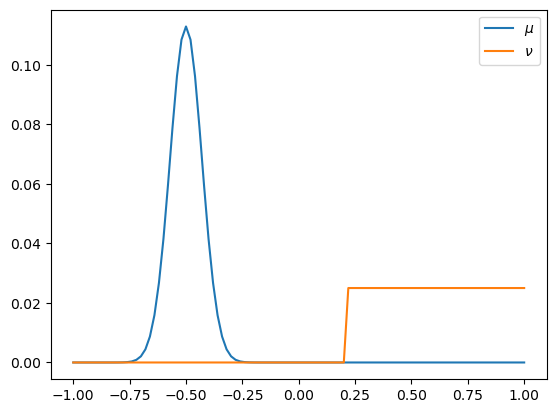

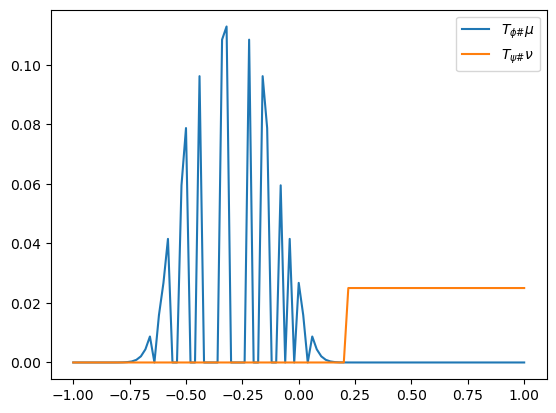

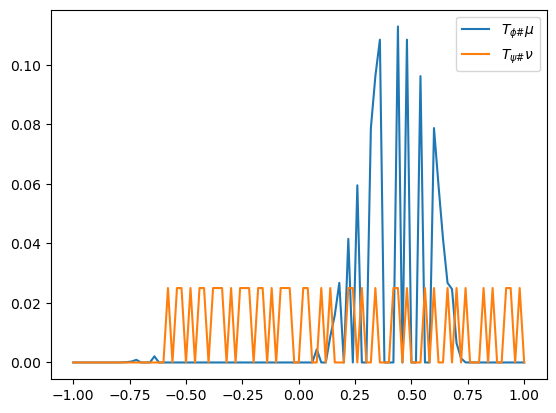

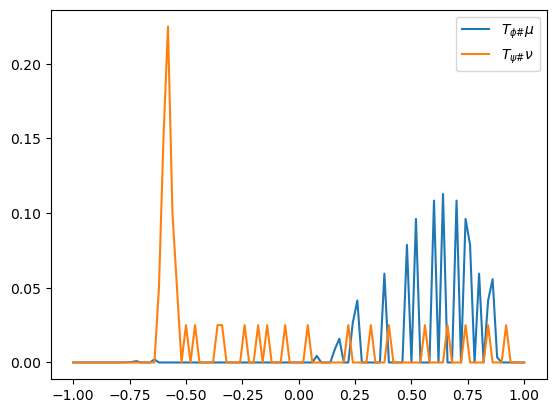

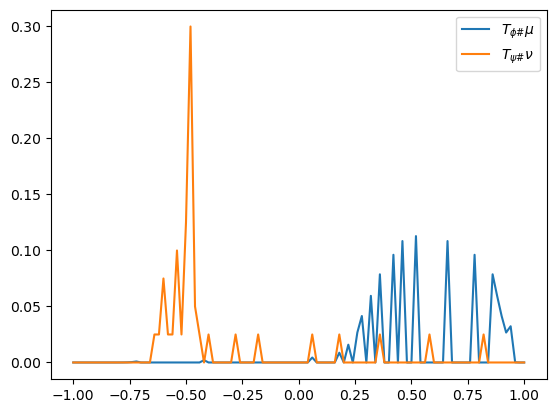

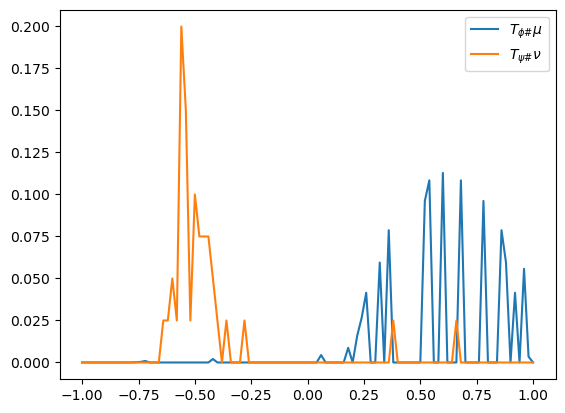

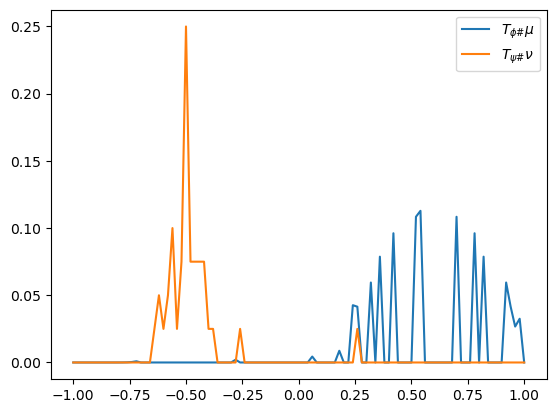

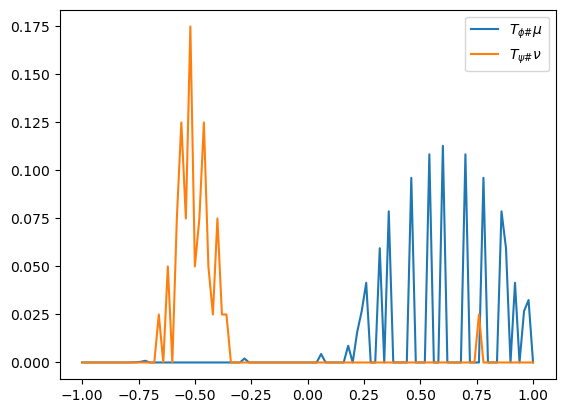

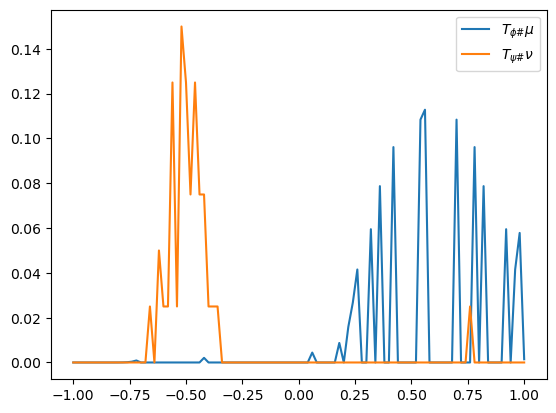

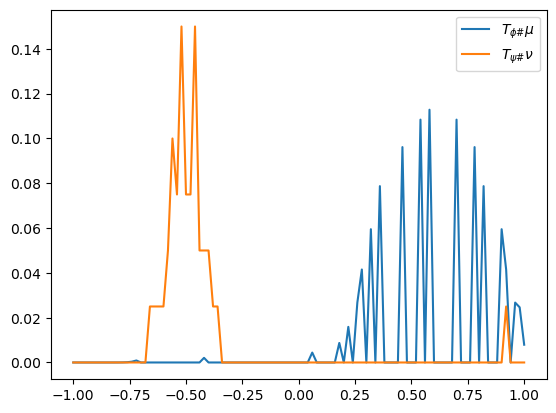

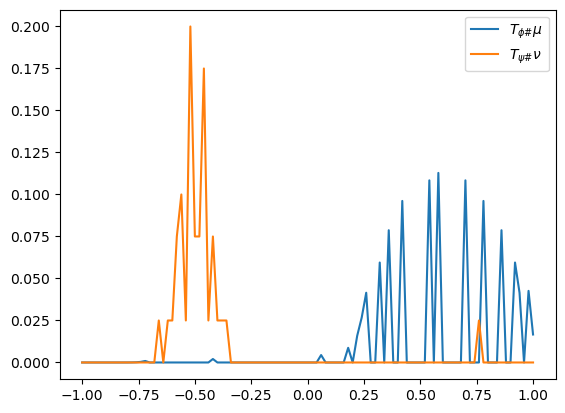

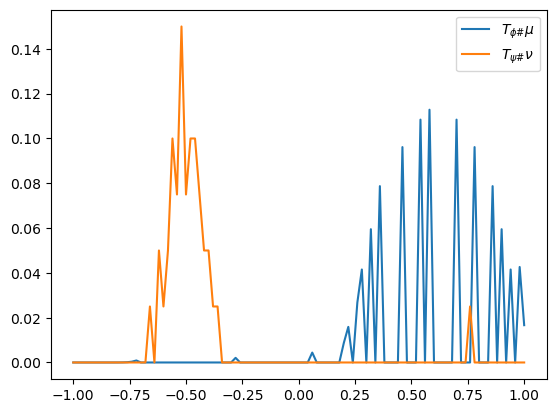

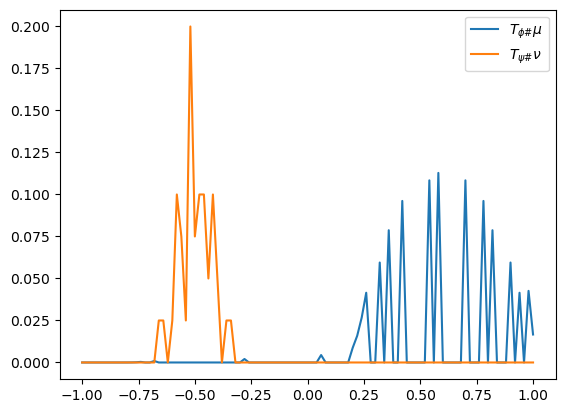

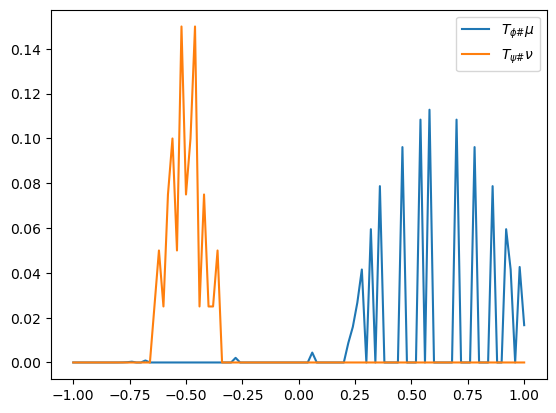

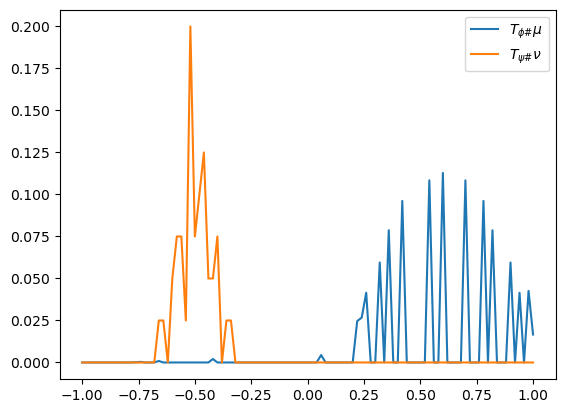

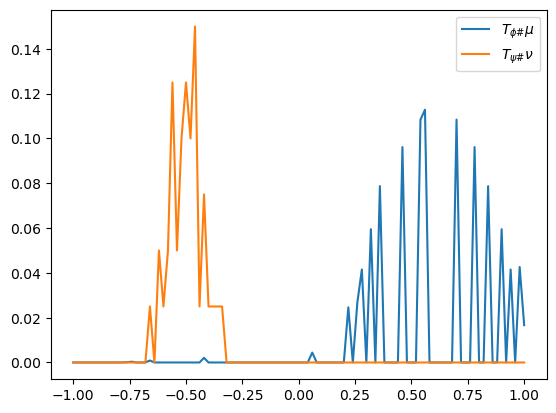

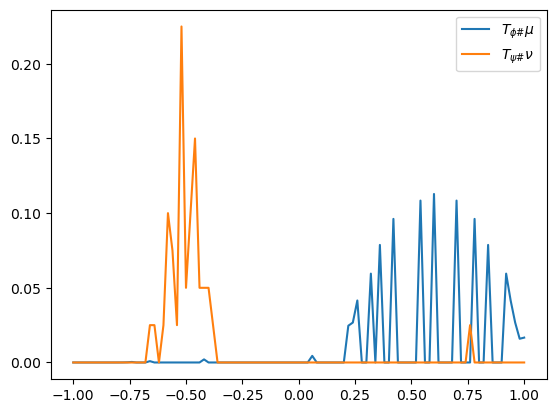

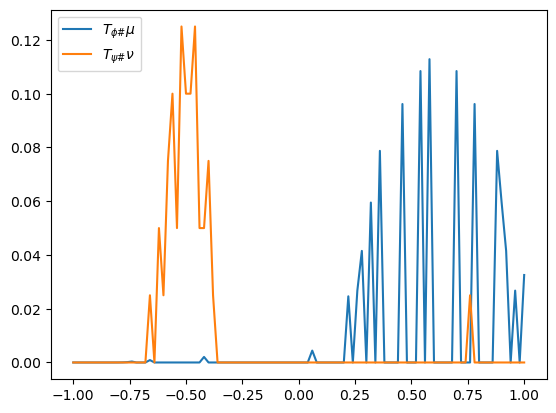

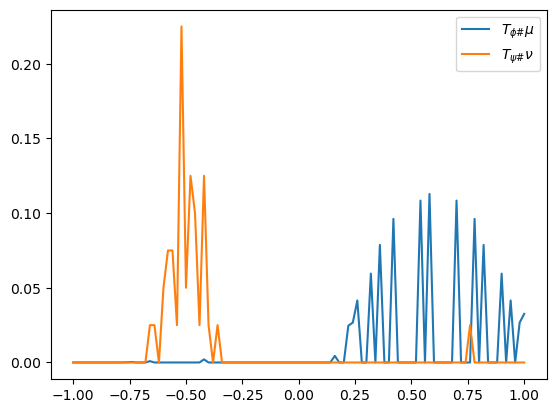

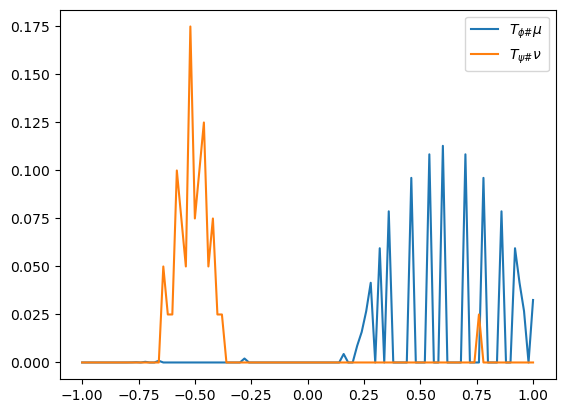

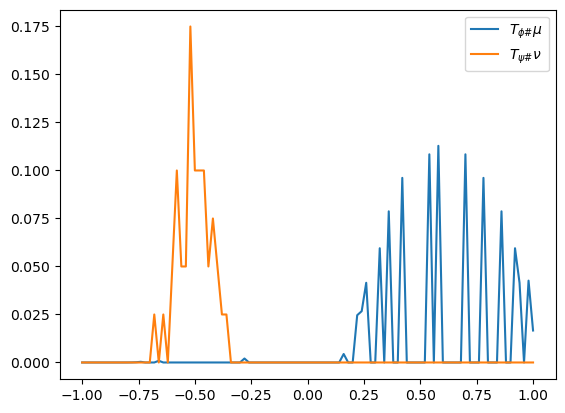

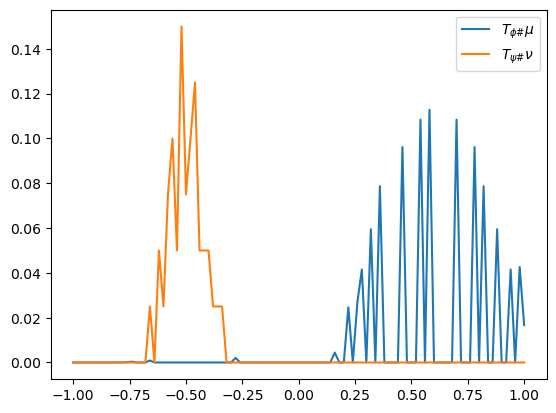

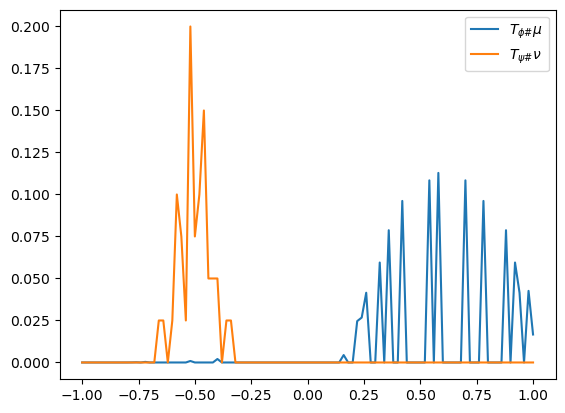

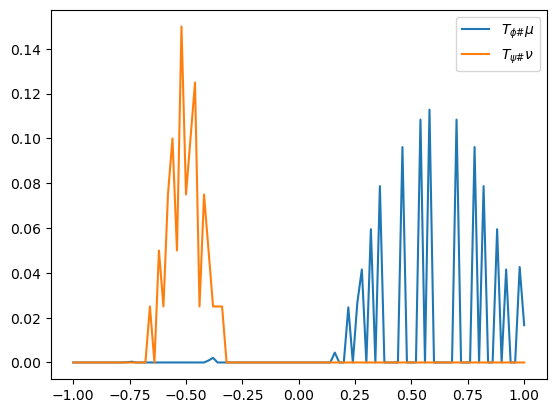

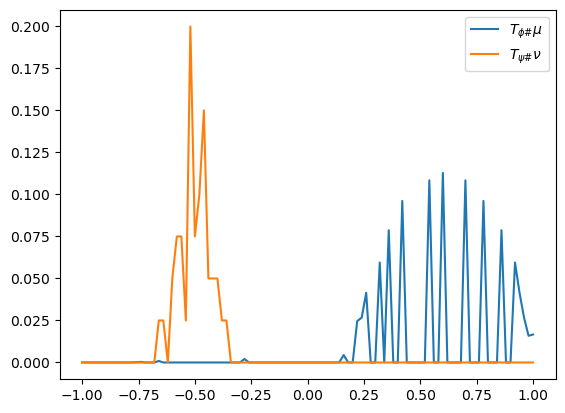

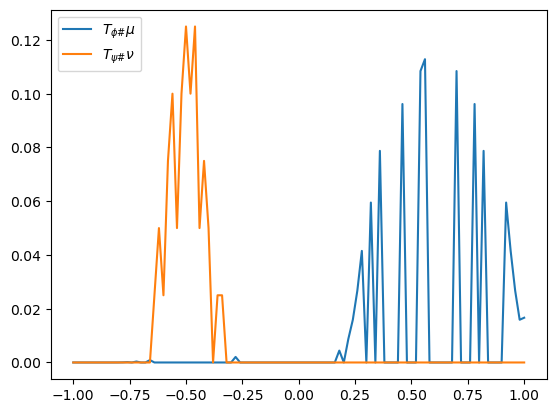

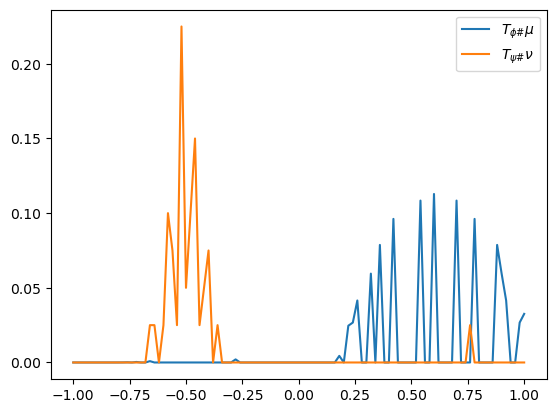

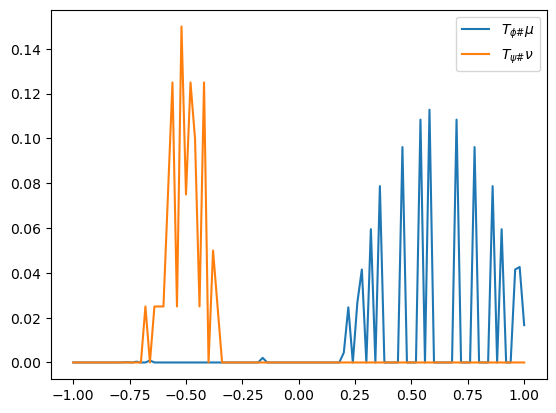

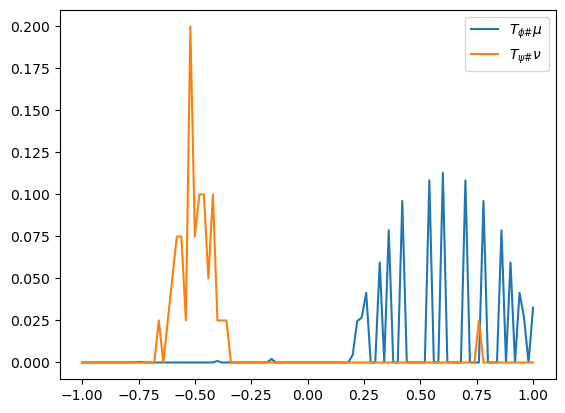

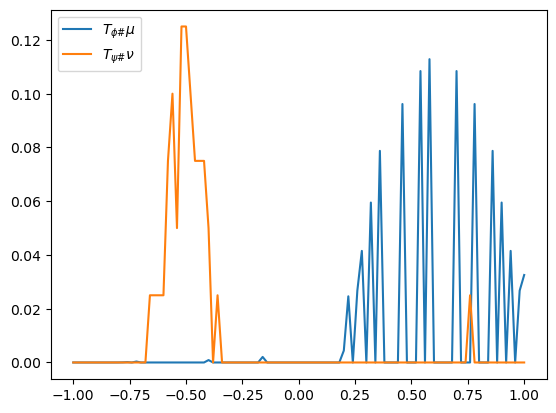

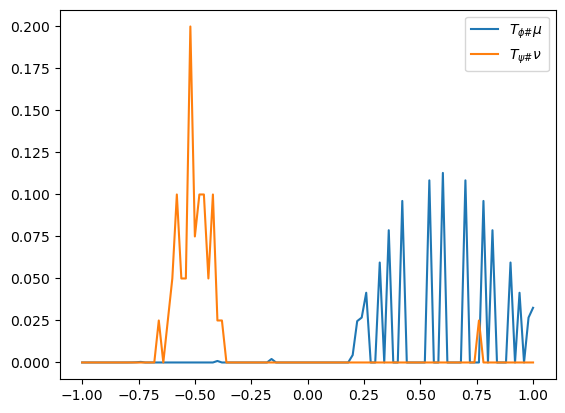

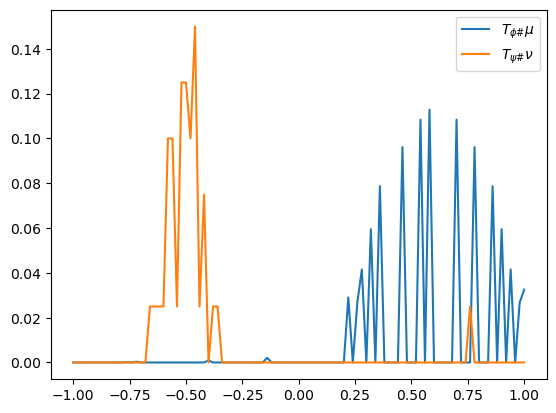

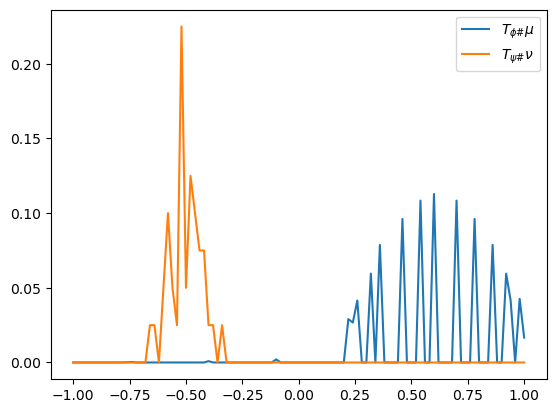

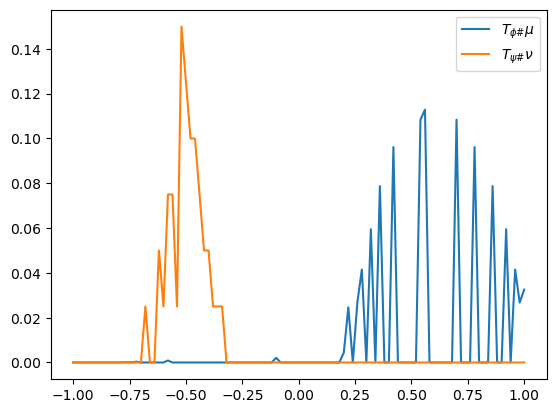

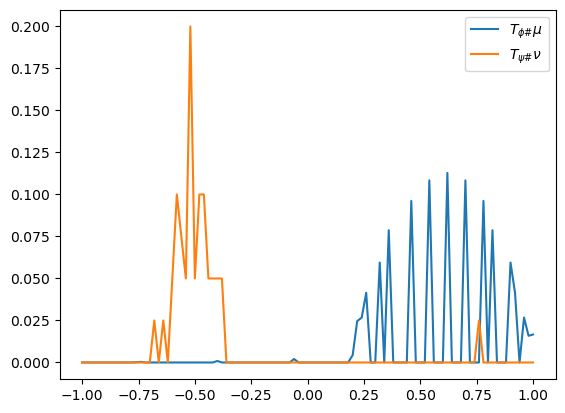

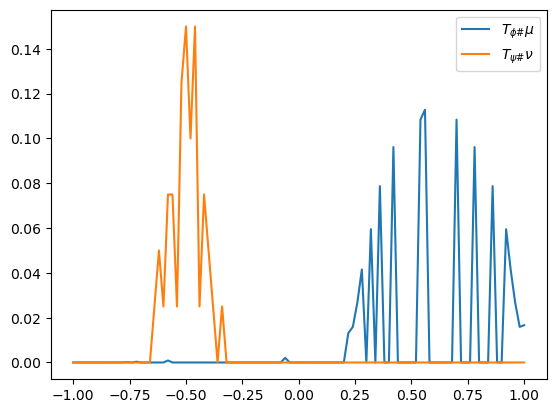

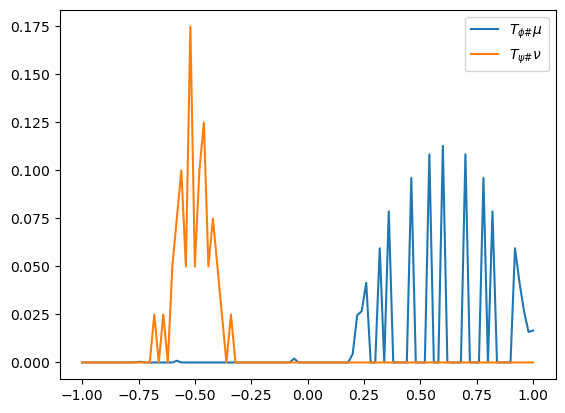

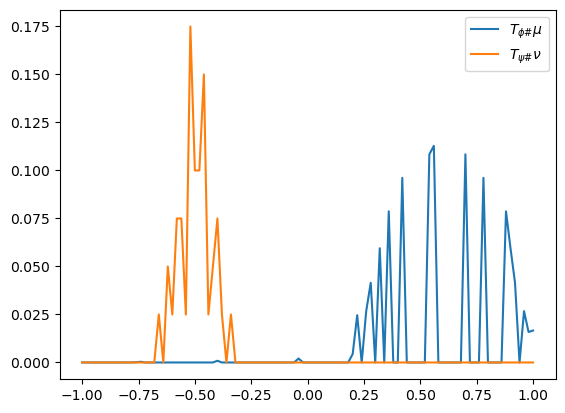

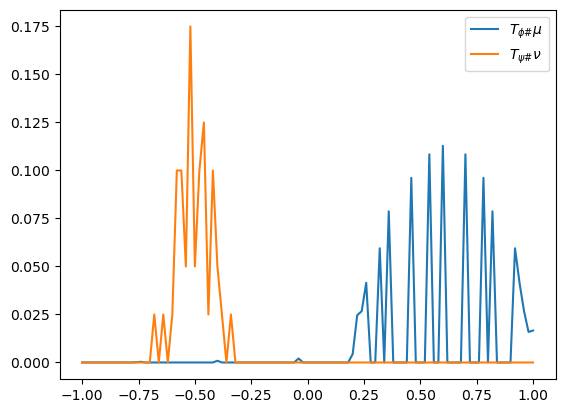

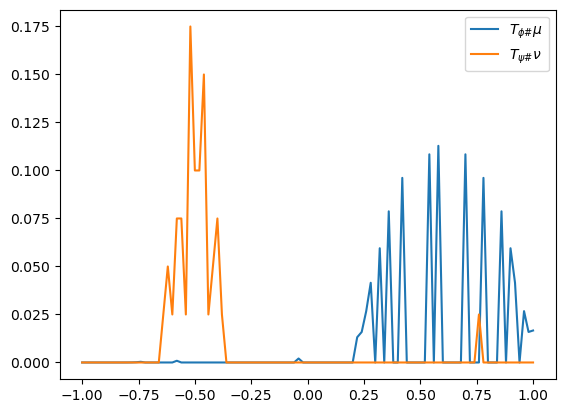

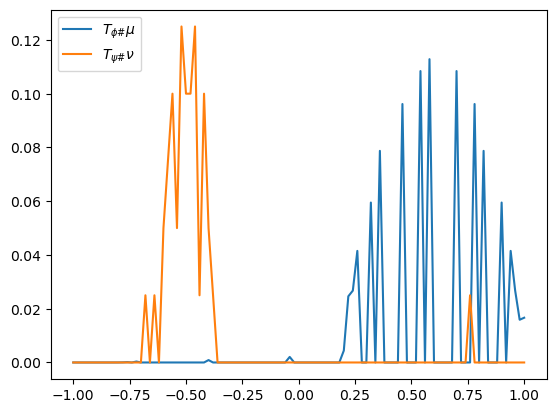

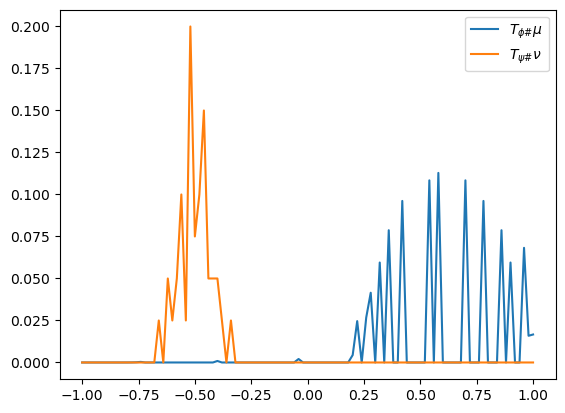

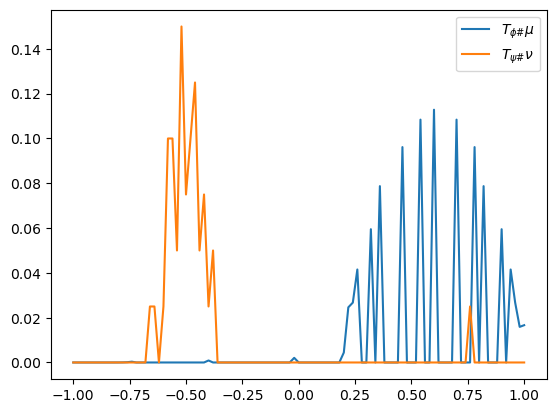

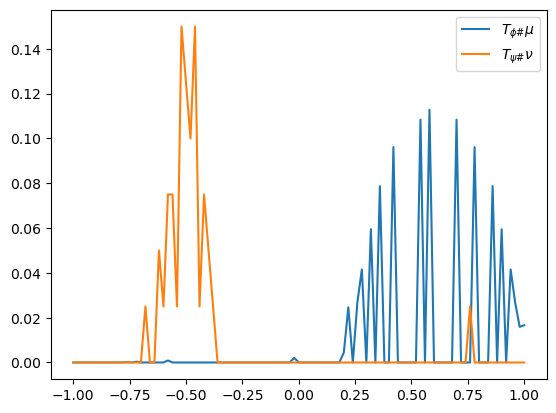

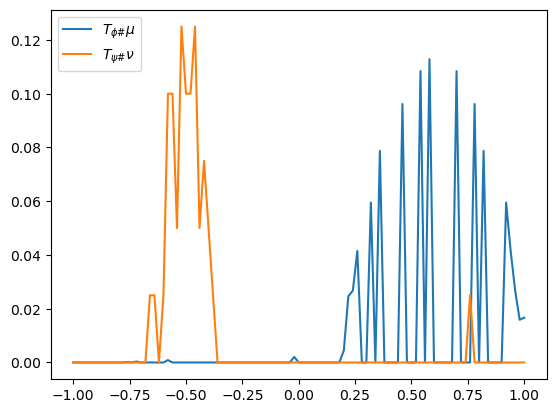

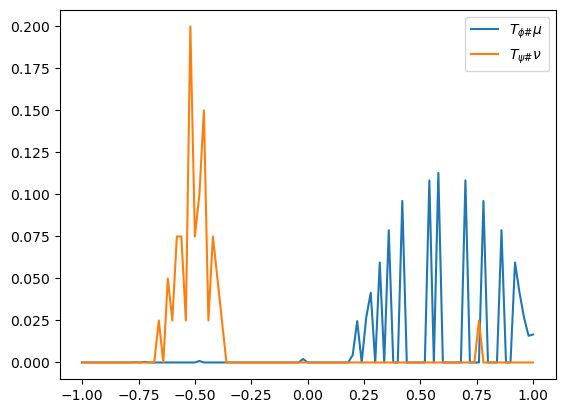

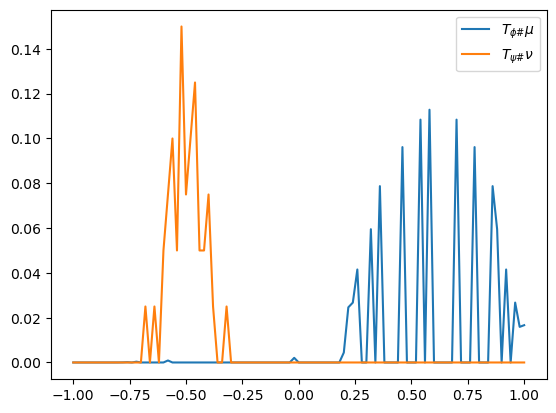

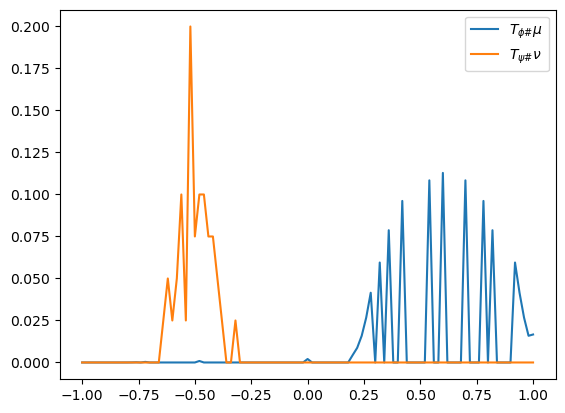

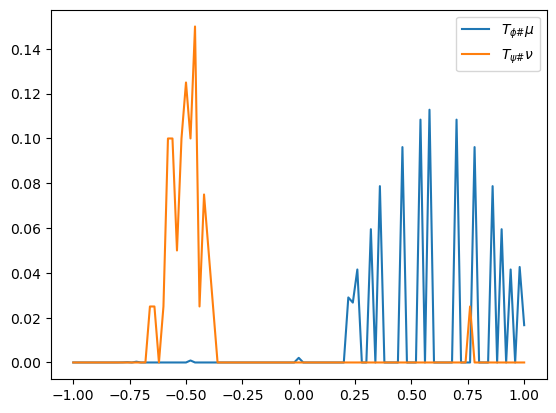

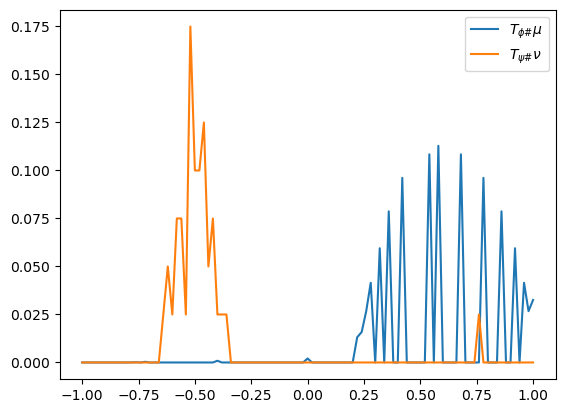

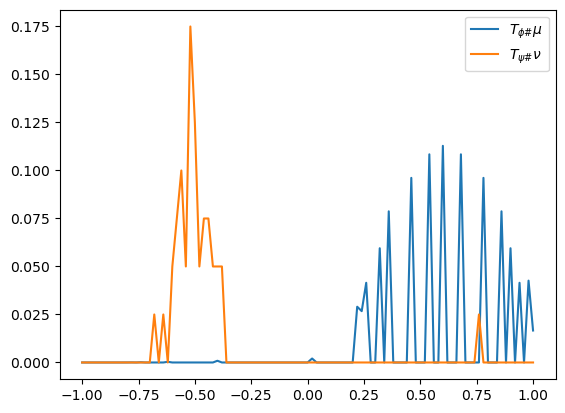

In [8]:
x = np.linspace(-1, 1, 101)
p = x

#mu = np.exp(-(x - 0.5)**2 * 100)   #e^(-(x-0.5)^2 * 100)
mu = np.where(x > 0.2, 1., 0.)     #True: 1. False: 0.
mu /= np.sum(mu)                   # mu = mu / np.sum(mu)
#nu = np.copy(mu[::-1])
#nu = np.exp(-(x + 0.2)**2 * 100) + np.exp(-(x+0.7)**2 * 100)
nu = np.exp(-(x + 0.5)**2 * 100)
nu /= np.sum(nu)                    
#plt.plot(x, mu)
#plt.plot(x, nu)

phi = np.zeros_like(x)
psi = np.zeros_like(x)

sigma = 8 / np.max(mu) / 4

phi_iopt = np.arange(len(x))
psi_iopt = np.arange(len(x))

plt.plot(x, push_forward(nu, psi_iopt),label=r'$\mu$')
plt.plot(x, push_forward(mu, phi_iopt),label=r'$\nu$')
plt.legend()
plt.show()

for k in range(50):    
    #plt.plot(x, lap_solve(nu - push_forward(mu, phi_iopt)))
    #plt.plot(x, phi)
    #plt.show()
    _, phi_iopt = c_transform(x, phi, p)                                #phi_{n + 1/2} = phi_{n} + sigma * nabla(J(phi_{n}))
    phi += sigma * lap_solve(nu - push_forward(mu, phi_iopt))
    psi, _ = c_transform(x, phi, p)                                     #psi_{n + 1/2} = (phi_{n + 1/2})^c
    
    _, psi_iopt = c_transform(x, psi, p)                                #psi_{n + 1} = psi_{n + 1/2} + sigma * nabla(I(psi_{n + 1/2}))
    psi += sigma * lap_solve(mu - push_forward(nu, psi_iopt))
    """\phi_{n + 1} = (psi_{n + 1})^c"""
    phi, _ = c_transform(x, psi, p)                                     #phi_{n + 1} = (psi_{n + 1})^c
    # plt.plot(x, phi)
    # plt.plot(x, psi)
    
    plt.plot(x, push_forward(nu, psi_iopt),label=r'$T_{\phi \#} \mu$')
    plt.plot(x, push_forward(mu, phi_iopt),label=r'$T_{\psi \#} \nu$')
    
    if k % 1 == 0:
        #plt.plot(x, push_forward(mu, phi_iopt))
        """2通りの表現があるT_{phi}の差を調べる"""
        t, phi_iopt = c_transform(x, phi, p)
        # plt.plot(x, x[phi_iopt])
        # plt.plot(x[1:], x[1:] - (t[1:] - t[:-1])/(x[1:] - x[:-1]))
        #plt.plot(x[1:], x[1:] - (t[1:] - t[:-1])/(x[1:] - x[:-1]) - x[phi_iopt][1:])
        
        """なめらかにする"""
        #plt.plot(x, lap_solve(nu - push_forward(mu, phi_iopt)))
        #plt.plot(x, lap_solve(mu - push_forward(nu, psi_iopt)))
        plt.legend()
        plt.show()

## The back-and-forth method

### 2 main ideas

1. Gradient ascent steps in the $\dot{H}^1$ metric where
   
    \begin{align*}
        \nabla_{\dot{H}^1} J(\phi) = (- \Delta)^{-1} (\nu - T_{\phi \#} \mu)\\
        \nabla_{\dot{H}^1} I(\psi) = (- \Delta)^{-1} (\mu - T_{\psi \#} \nu)\\
    \end{align*}

2. A back-and-forth update scheme, alternating between gradient ascent steps on $J$ and $I$.

### Algorithm: The back-and-forth method

Given probability densities $\mu$ and $\nu$, set $\phi_0 = 0, \psi_0 = 0$, and iterate:

\begin{align*}
    \phi_{n + \frac{1}{2}} &= \phi_{n} + \sigma \nabla_{\dot{H}^1} J(\phi_{n}),\\
    \psi_{n + \frac{1}{2}} &= (\phi_{n + \frac{1}{2}})^c,\\
    \psi_{n + 1} &= \psi_{n + \frac{1}{2}} + \sigma \nabla_{\dot{H}^1} I(\psi_{n + \frac{1}{2}}),\\
    \phi_{n + 1} &= (\psi_{n + 1})^c.\\
\end{align*}

### $\mu$ and $\nu$ back-and-forth update

#### Example 1

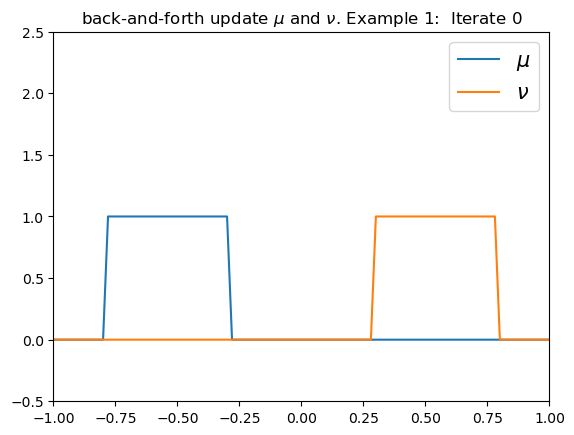

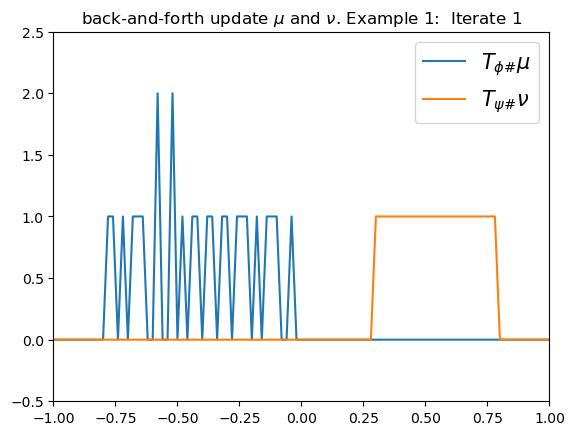

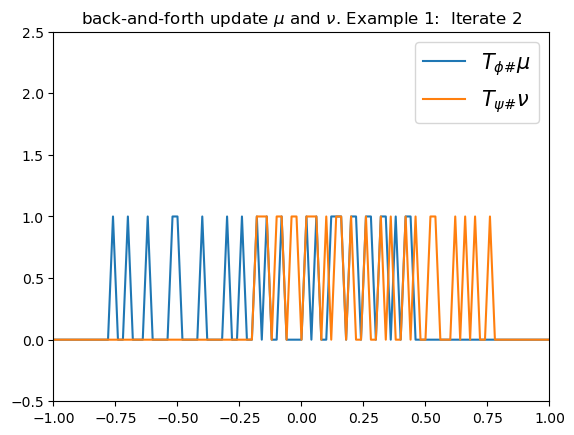

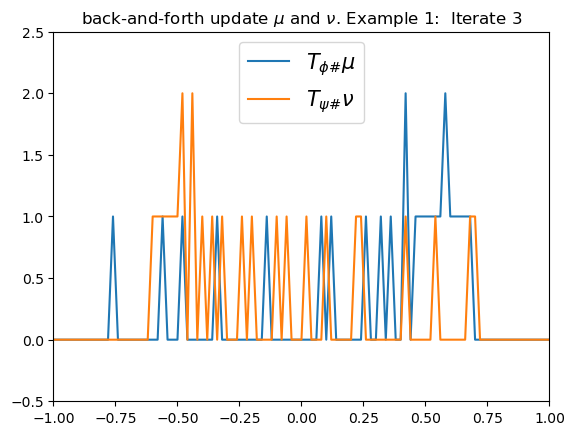

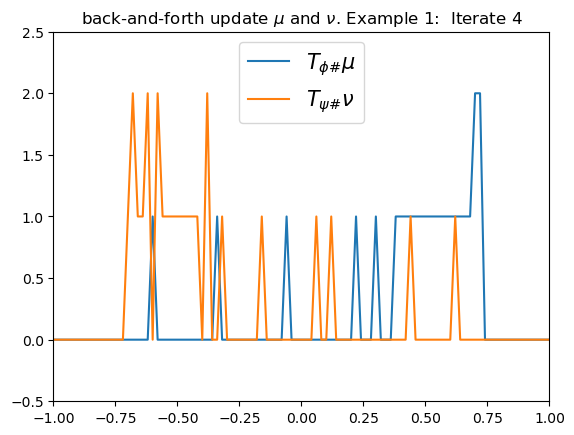

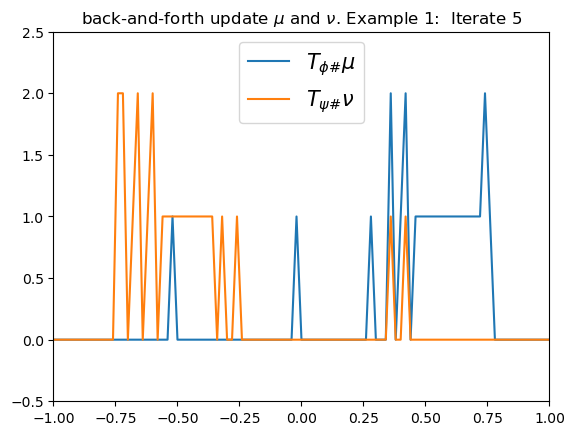

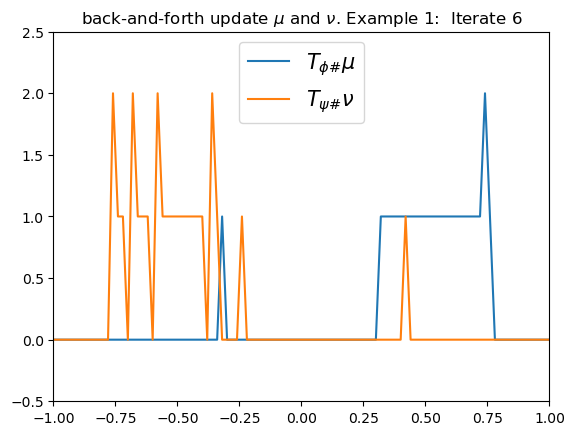

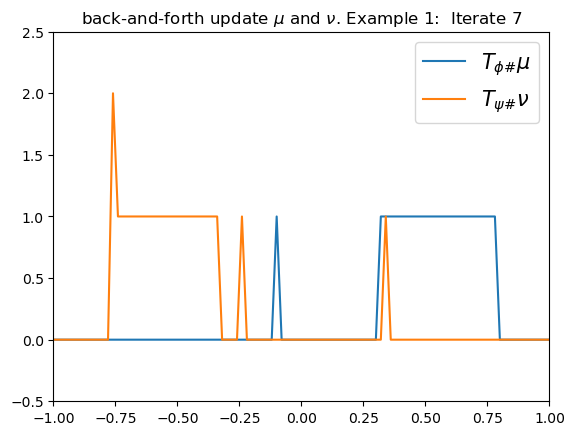

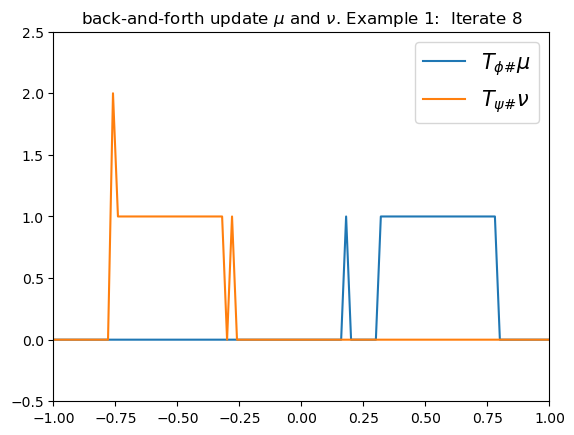

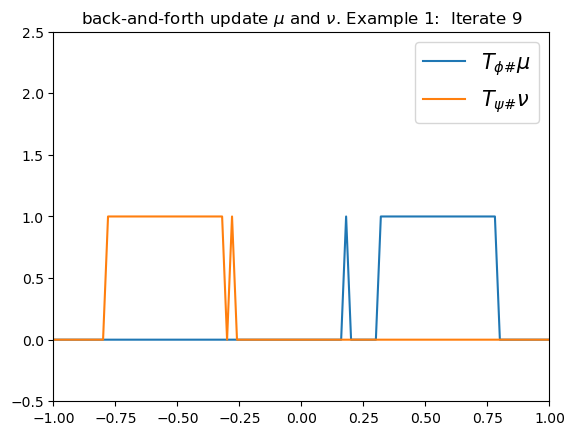

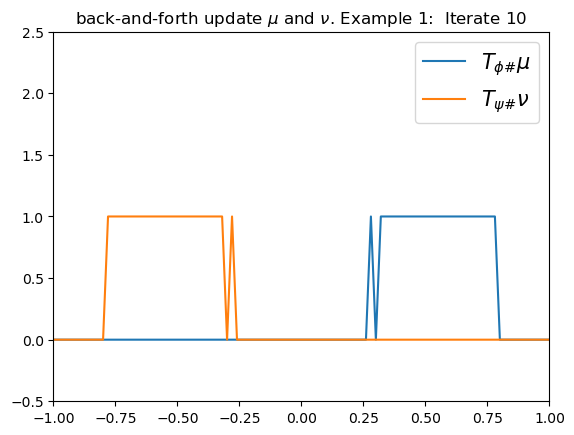

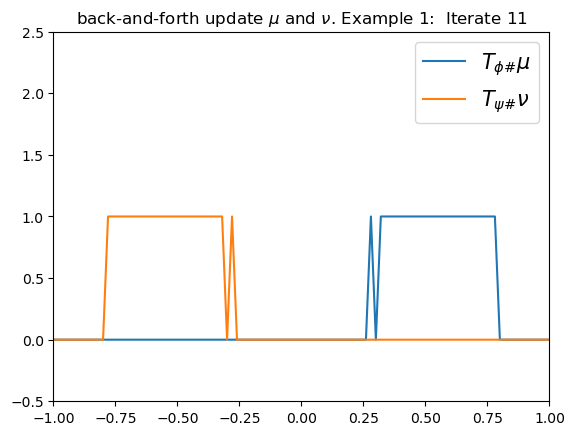

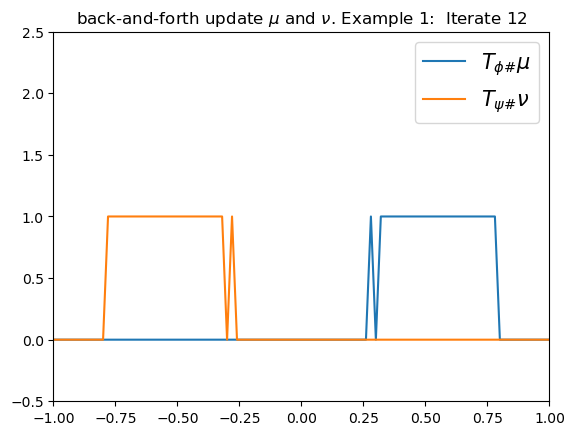

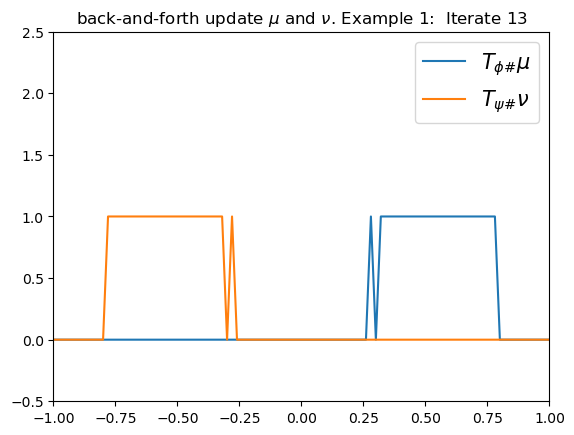

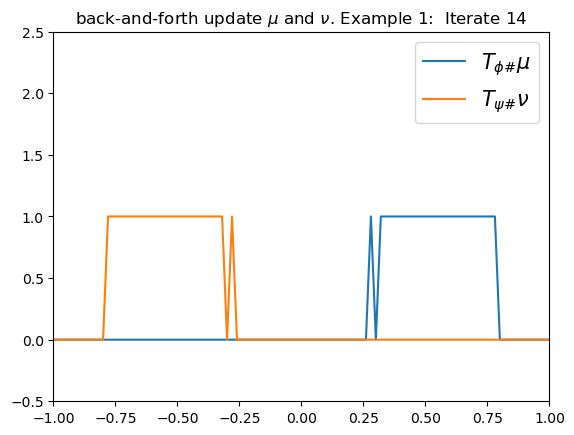

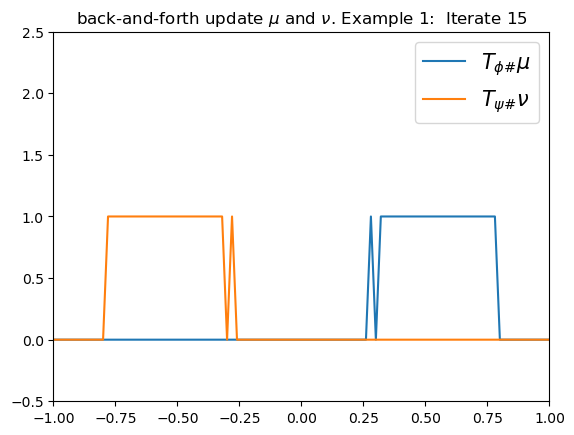

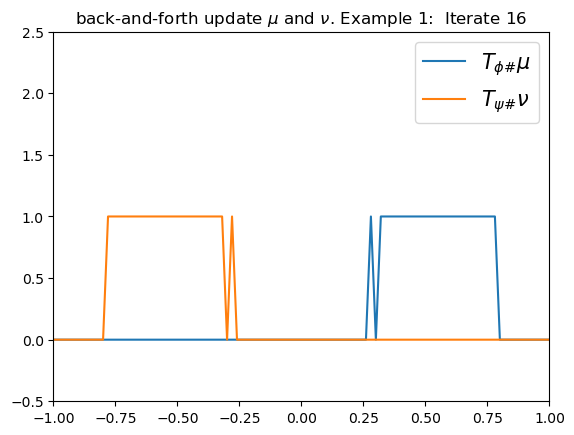

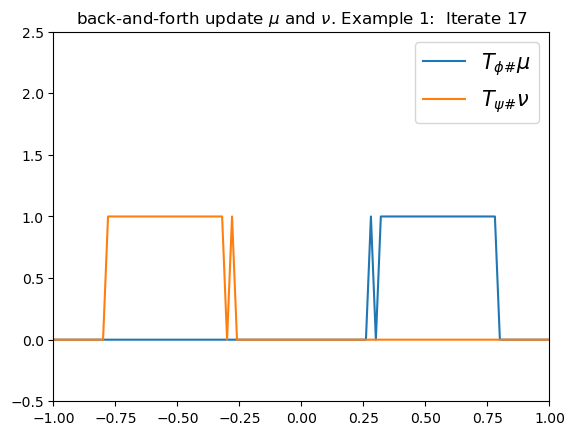

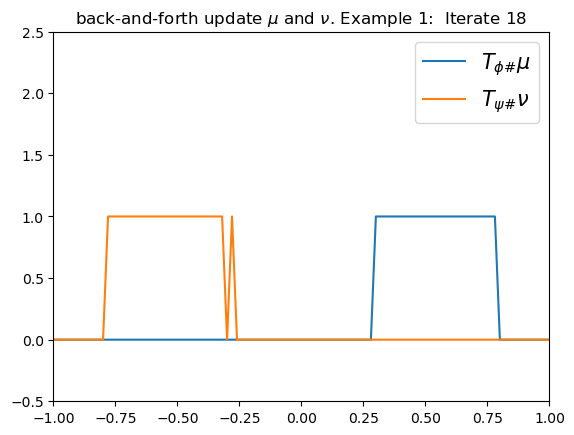

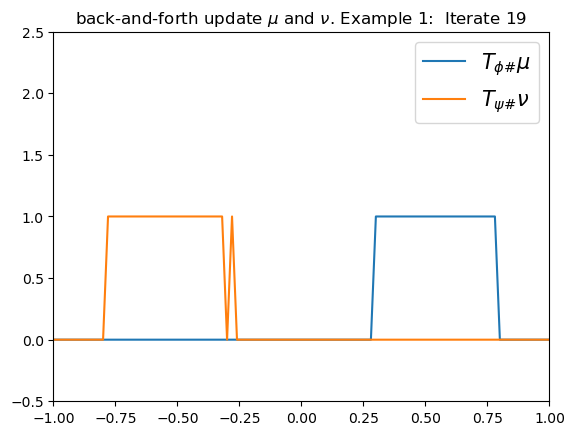

In [13]:
x = np.linspace(-1, 1, 101)
p = x

mu = np.where((x > 0.3) & (x < 0.8), 1., 0.)     #True: 1. False: 0.
nu = np.copy(mu[::-1])

phi = np.zeros_like(x)
psi = np.zeros_like(x)

sigma = 8 / np.max(mu) / 4

phi_iopt = np.arange(len(x))
psi_iopt = np.arange(len(x))

plt.title(r'back-and-forth update $\mu$ and $\nu$. Example 1:  Iterate 0')
plt.plot(x, push_forward(nu, psi_iopt),label=r'$\mu$')
plt.plot(x, push_forward(mu, phi_iopt),label=r'$\nu$')
plt.xlim(-1,1)
plt.ylim(-0.5,2.5) 
plt.legend(prop={'size': 15})
plt.show()

for k in range(19):
    _, phi_iopt = c_transform(x, phi, p)
    phi += sigma * lap_solve(nu - push_forward(mu, phi_iopt))
    psi, _ = c_transform(x, phi, p)                             #psi_{n + 1/2} = (phi_{n + 1/2})^c
    
    _, psi_iopt = c_transform(x, psi, p)
    psi += sigma * lap_solve(mu - push_forward(nu, psi_iopt))
    phi, _ = c_transform(x, psi, p)                             #phi_{n + 1} = (psi_{n + 1})^c
    
    plt.title(r'back-and-forth update $\mu$ and $\nu$. Example 1:  Iterate ' + str(k+1))
    plt.plot(x, push_forward(nu, psi_iopt),label=r'$T_{\phi \#} \mu$')
    plt.plot(x, push_forward(mu, phi_iopt),label=r'$T_{\psi \#} \nu$')
    
    if k % 1 == 0:
        plt.xlim(-1,1)
        plt.ylim(-0.5,2.5) 
        plt.legend(prop={'size': 15})
        plt.show()

#### Example 2

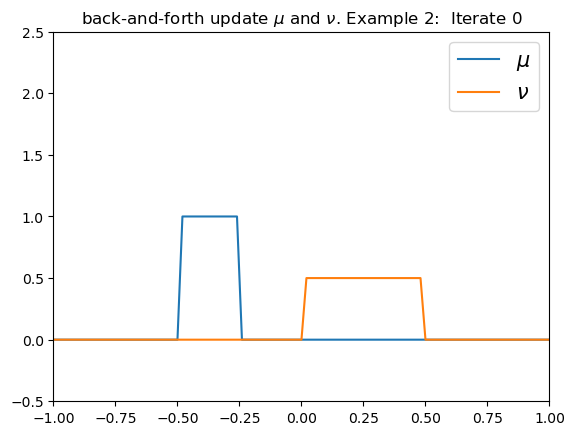

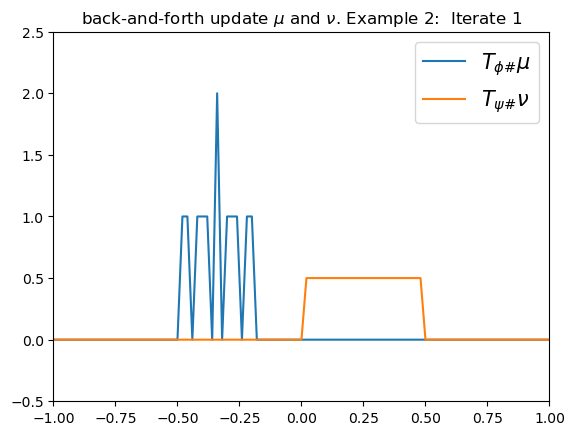

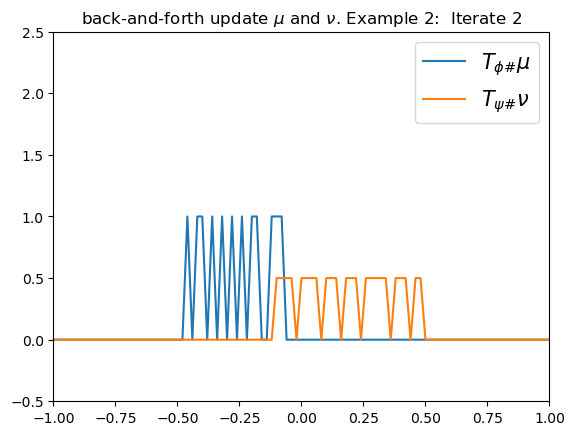

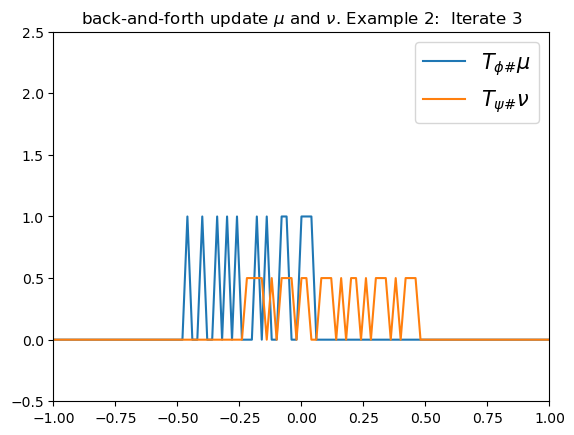

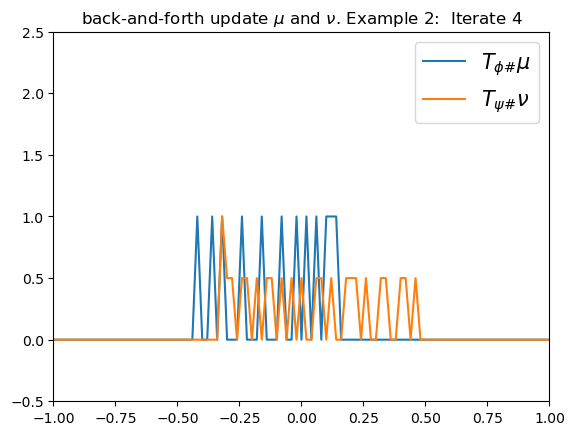

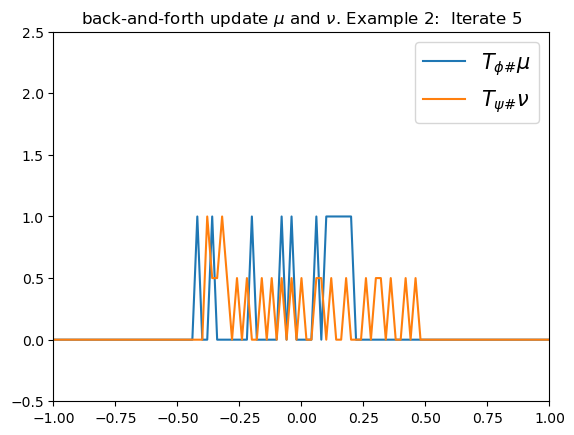

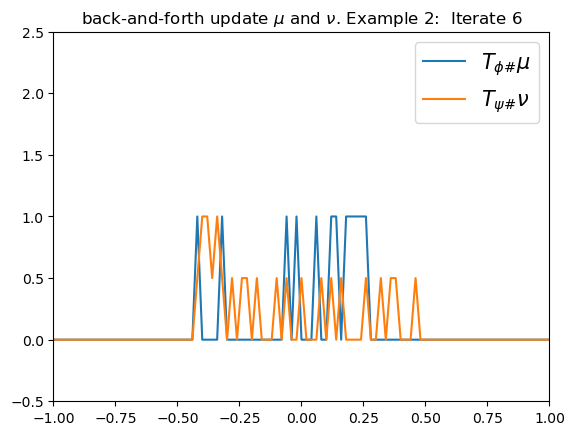

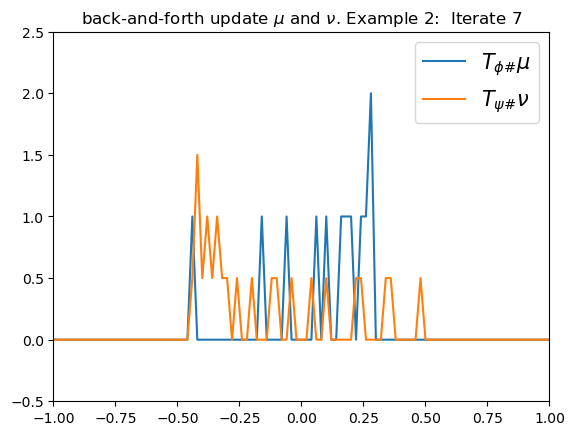

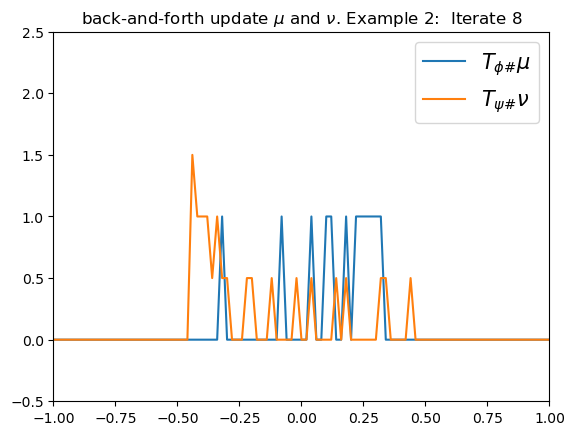

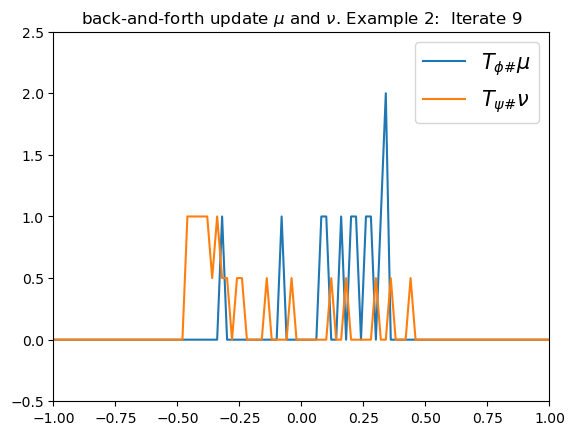

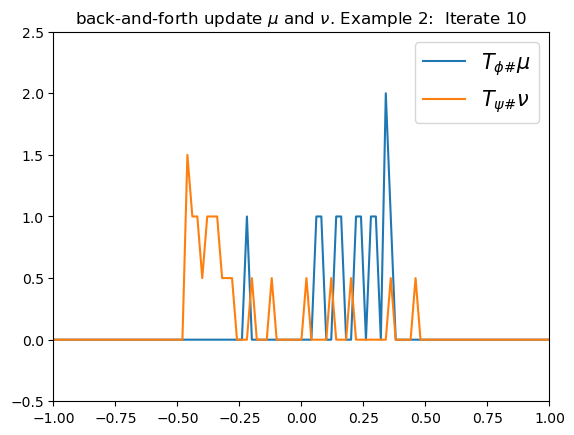

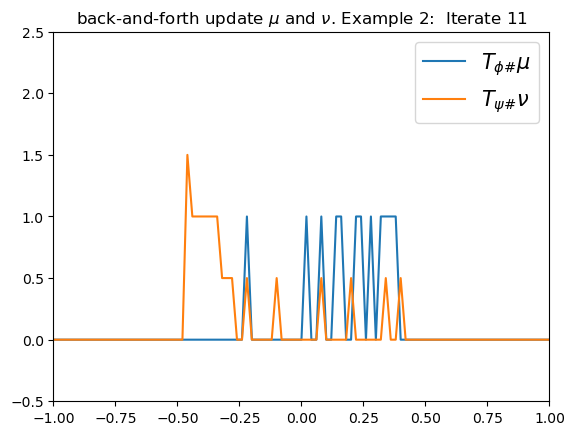

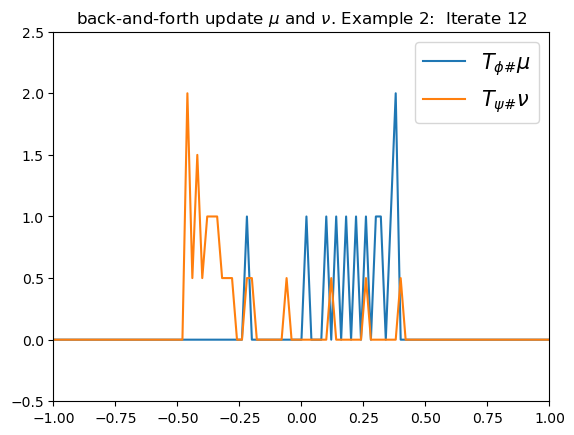

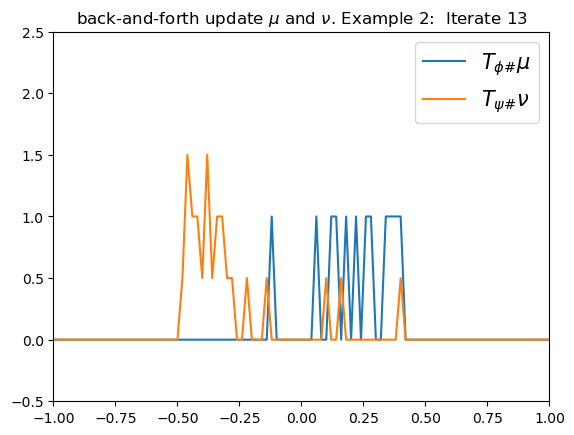

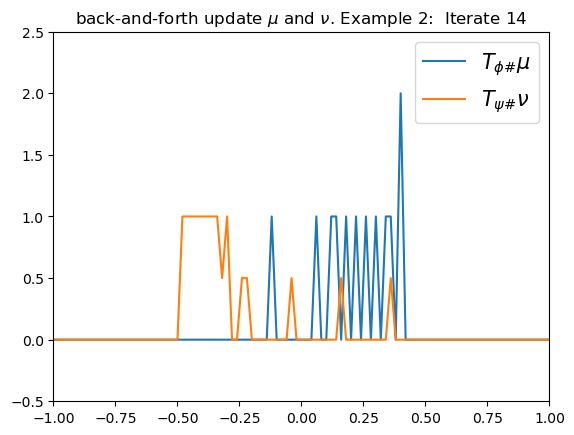

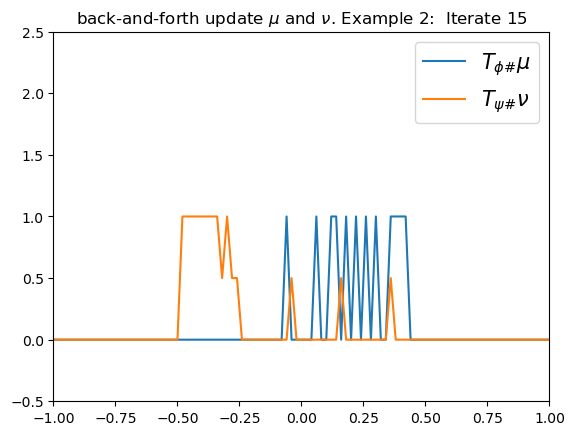

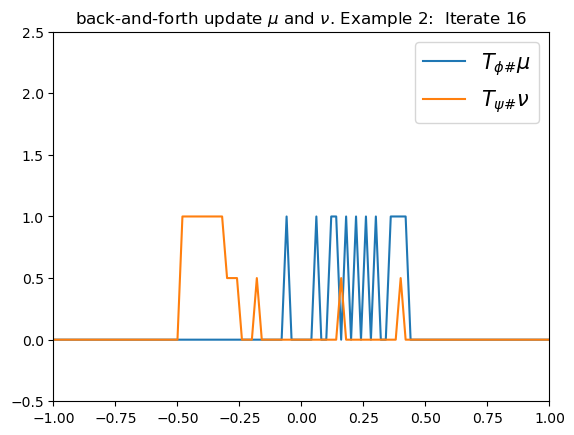

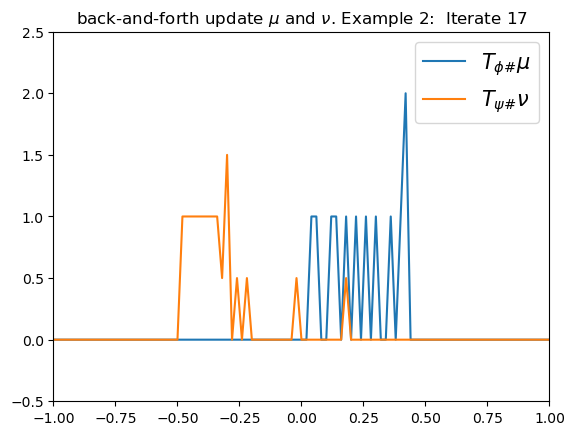

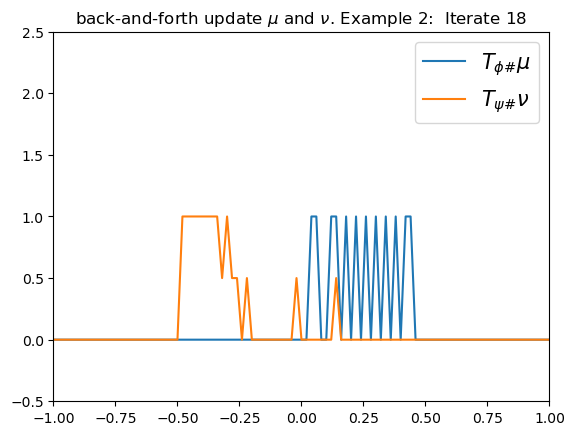

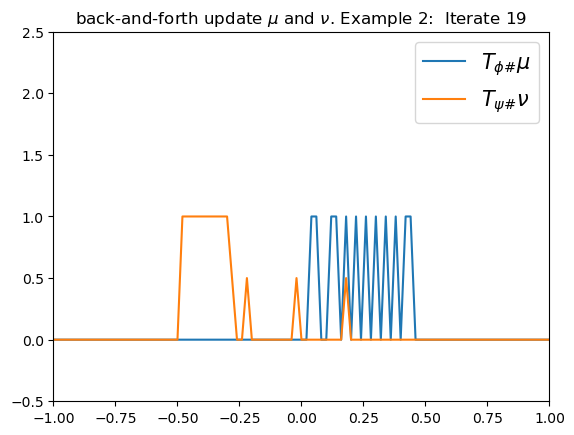

In [14]:
x = np.linspace(-1, 1, 101)
p = x

mu = np.where((x > 0.) & (x < 0.5), 0.5, 0.)     #True: 1. False: 0.
nu = np.where((x > -0.5) & (x < -0.25), 1., 0.)

phi = np.zeros_like(x)
psi = np.zeros_like(x)

sigma = 1

phi_iopt = np.arange(len(x))
psi_iopt = np.arange(len(x))

plt.title(r'back-and-forth update $\mu$ and $\nu$. Example 2:  Iterate 0')
plt.plot(x, push_forward(nu, psi_iopt),label=r'$\mu$')
plt.plot(x, push_forward(mu, phi_iopt),label=r'$\nu$')
plt.xlim(-1,1)
plt.ylim(-0.5,2.5) 
plt.legend(prop={'size': 15})
plt.show()

for k in range(19):
    _, phi_iopt = c_transform(x, phi, p)
    phi += sigma * lap_solve(nu - push_forward(mu, phi_iopt))
    psi, _ = c_transform(x, phi, p)                             #psi_{n + 1/2} = (phi_{n + 1/2})^c
    
    _, psi_iopt = c_transform(x, psi, p)
    psi += sigma * lap_solve(mu - push_forward(nu, psi_iopt))
    phi, _ = c_transform(x, psi, p)                             #phi_{n + 1} = (psi_{n + 1})^c
    
    plt.title(r'back-and-forth update $\mu$ and $\nu$. Example 2:  Iterate ' + str(k+1))
    plt.plot(x, push_forward(nu, psi_iopt),label=r'$T_{\phi \#} \mu$')
    plt.plot(x, push_forward(mu, phi_iopt),label=r'$T_{\psi \#} \nu$')
    
    if k % 1 == 0:
        plt.xlim(-1,1)
        plt.ylim(-0.5,2.5) 
        plt.legend(prop={'size': 15})
        plt.show()